<a href="https://colab.research.google.com/github/KDiBSilva/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**

Kristina DiBella Silva

##Project Overview

##Data Dictionary

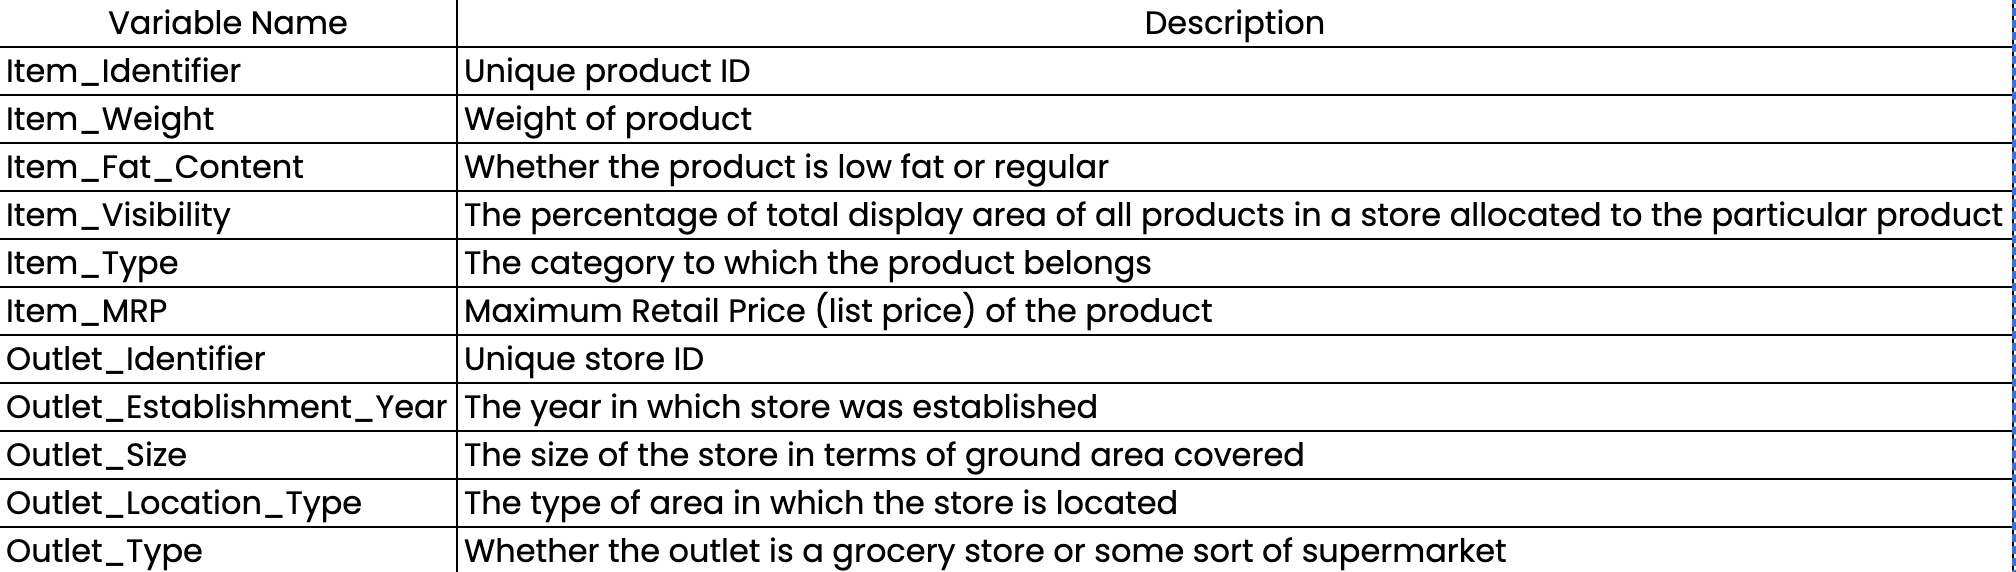

###Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = '/content/drive/My Drive/Coding Dojo/Data/sales_predictions.csv'
sp_df = pd.read_csv(filename)

In [4]:
sp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

1) How many rows and columns?

In [6]:
sp_df.shape

(8523, 12)

- There are 8523 rows and 12 columns. 

2) What are the datatypes of each variable?

In [7]:
sp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [8]:
sp_df.duplicated().sum()

0

- No duplicates found.

4) Identify missing values.

In [9]:
sp_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the Item_Weight column. 

- There are 2410 missing values in the Outlet_Size column.

In [10]:
sp_df.isna().sum() / len(sp_df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Item_Weight is missing 17% of the values. 
- Outlet_Size is missing 28% of the values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

**Addressing the Outlet_Size missing values**
- 28% of the data for this column is missing, I  will be replacing the values with "Unknown".

In [11]:
sp_df['Outlet_Size'].fillna('Unknown', inplace= True)

**Addressing the missing Item_Weight values**
- I am going to check the mean of Item_Weight and compare it to the median. 

In [12]:
sp_df['Item_Weight'].mean()

12.857645184135976

- Mean is 9.300

In [13]:
sp_df['Item_Weight'].median()

12.6

- Median is 9.300

- There was no outlier as mean and median returned the same value 9.300.
- I will fill the missing values of Item_Weight with 9.300 using the average.

In [14]:
mean_iwght = sp_df['Item_Weight'].mean()
sp_df['Item_Weight'].fillna(mean_iwght, inplace=True)


In [15]:
sp_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

6) Confirm that there are no missing values after addressing them.

In [16]:
sp_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Item_Weight and Outlet_Size are no longer missing values.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [17]:
sp_df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- Item_Fat_Content has five different values, however looking at the data dictionary there should only be two, Low Fat or Regular. 
- I will need to check what the other values are in order to replace them with the correct value. 

In [18]:
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- I will replace "LF" and "low fat" with "Low Fat"
- I will replace "reg" with "Regular"

In [19]:
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('LF','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('low fat','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('reg','Regular')

sp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [20]:
sp_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


##Exploratory Data Analysis

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

###Catagorical

Item Fat Content Count Plot

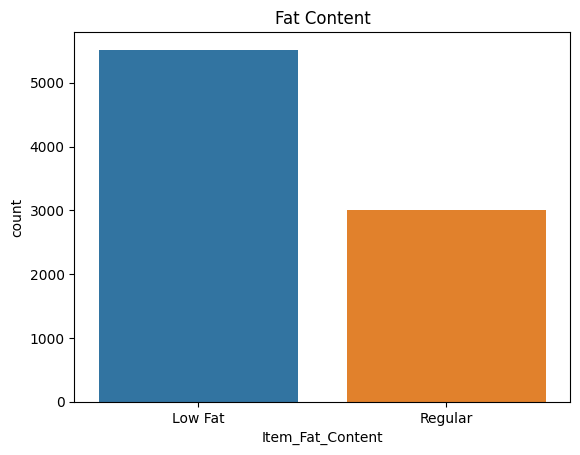

In [21]:
ax = sns.countplot(data = sp_df, x= 'Item_Fat_Content')
ax.set_title('Fat Content');

- There are more Low Fat items than regular.

Item Type Count Plot

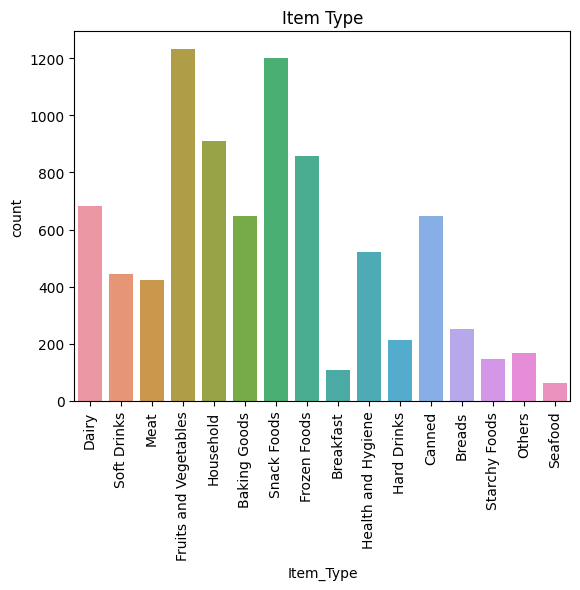

In [22]:
ax = sns.countplot(data = sp_df, x= 'Item_Type')
ax.set_title('Item Type')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

- This bar chart shows that the highest amount of items are within the Fruits and Vegatables, secondly being Snack Food type and thirdly being Household items.

Outlet Identifier Count Plot

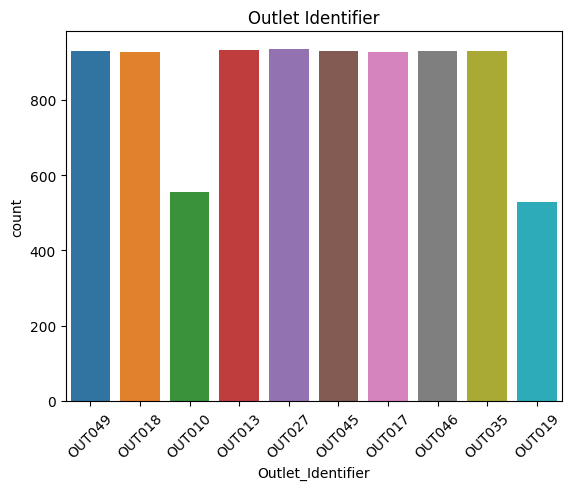

In [23]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Identifier')
ax.set_title('Outlet Identifier')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- OUT010 and OUT019 have the least amount of enteries. 

Outlet Size Count Plot

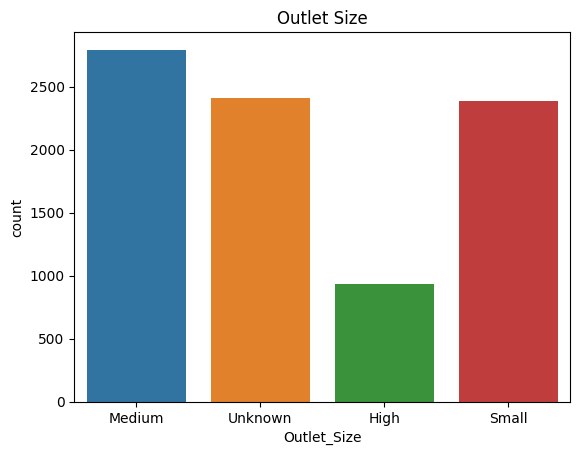

In [24]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Size')
ax.set_title('Outlet Size');

- The High Outlet size has the least values and the Medium Outlet size has the highest. 

Outlet Location Count Plot

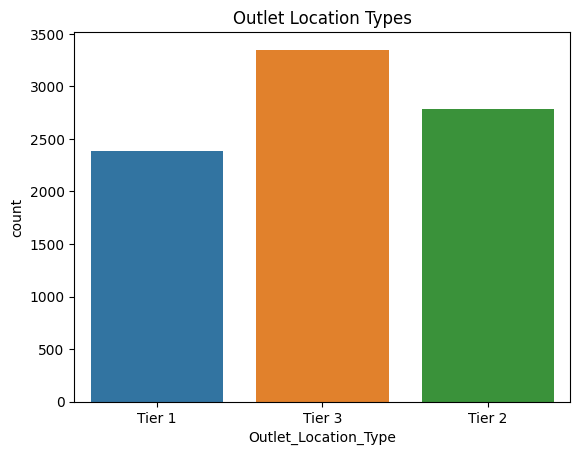

In [25]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Location_Type')
ax.set_title('Outlet Location Types');

- Tier 3 of location type has the highest count. 

Outlet Type Count Plot

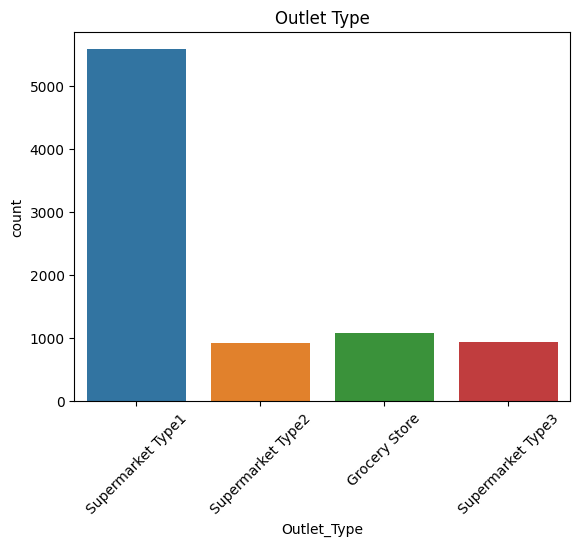

In [26]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Type')
ax.set_title('Outlet Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- Supermarket Type1 outstandingly carries the greater count of items. 

###Numerical

Item Weight Histogram and Box Plot.

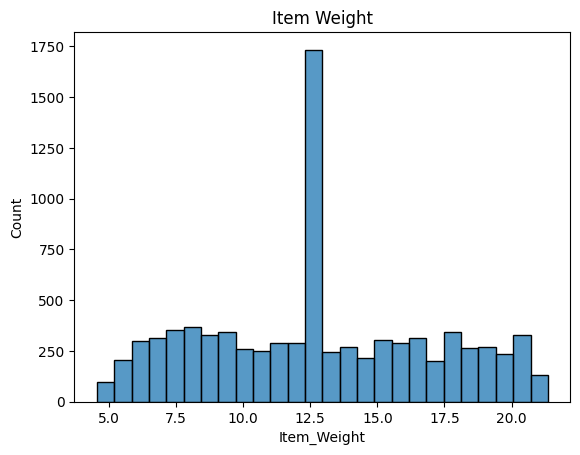

In [27]:
ax = sns.histplot(data= sp_df, x= 'Item_Weight')

ax.set_title('Item Weight');

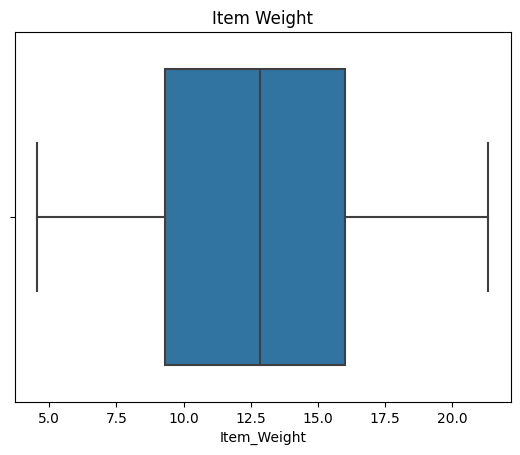

In [28]:
ax = sns.boxplot(x = 'Item_Weight', data = sp_df)
ax.set_title('Item Weight');

- There is a greater amount of items with the weight of 12.5.

Item Visibility Histogram and Box Plot.

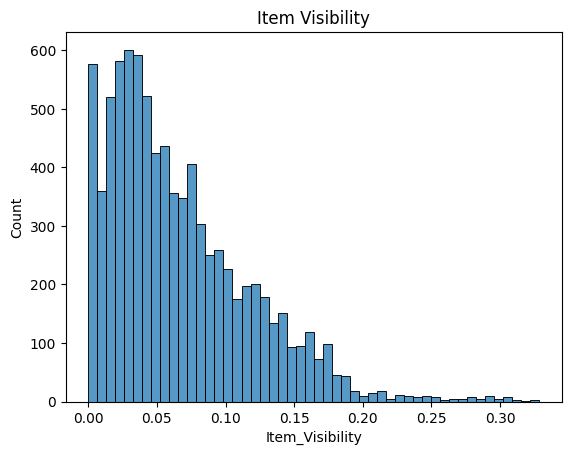

In [29]:
ax = sns.histplot(data= sp_df, x= 'Item_Visibility')

ax.set_title('Item Visibility');

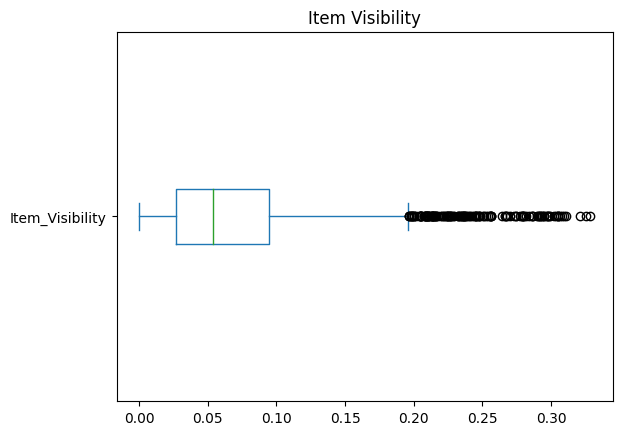

In [30]:
ax = sp_df['Item_Visibility'].plot(kind = 'box', vert= False)
ax.set_title('Item Visibility');

- The visibility of items are greatly skewed to the right. 

Item MRP Histogram and Box Plot.

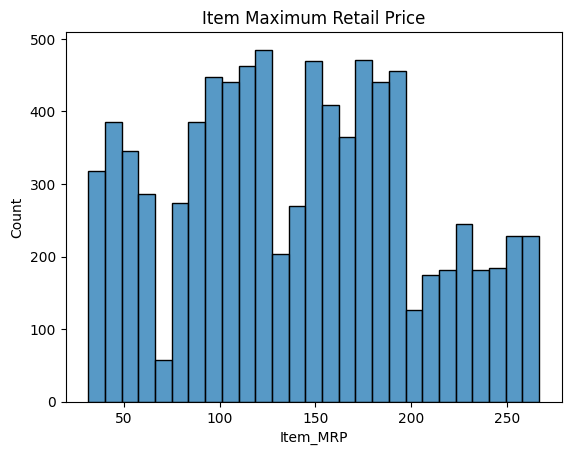

In [31]:
ax = sns.histplot(data= sp_df, x= 'Item_MRP')

ax.set_title('Item Maximum Retail Price');

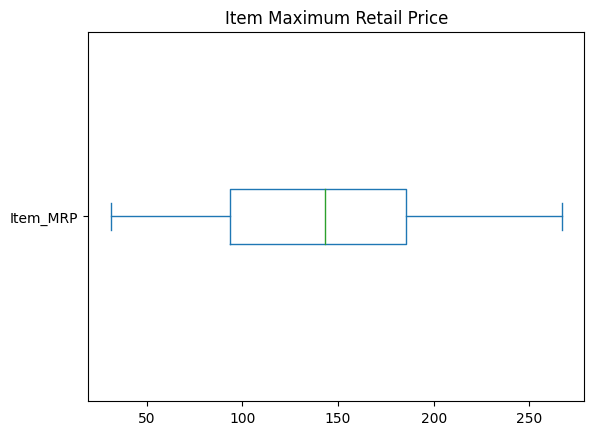

In [32]:
ax = sp_df['Item_MRP'].plot(kind = 'box', vert= False)
ax.set_title('Item Maximum Retail Price');

Outlet Establishment Year Histogram and Box Plot.

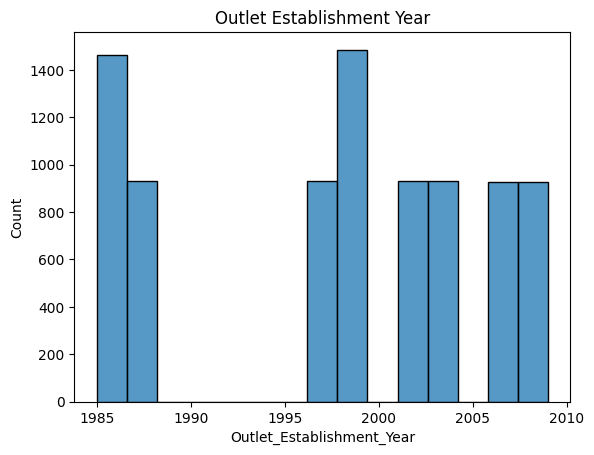

In [33]:
ax = sns.histplot(data= sp_df, x= 'Outlet_Establishment_Year')

ax.set_title('Outlet Establishment Year');

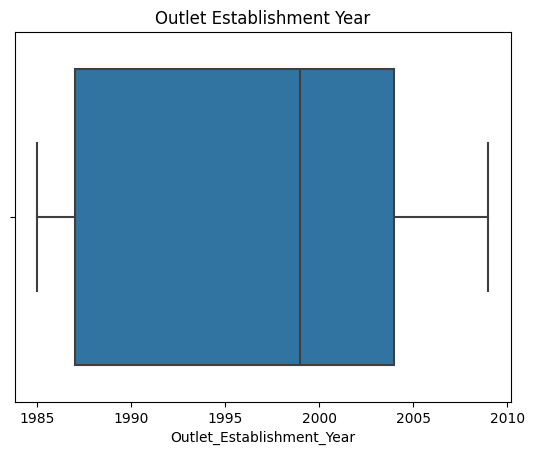

In [34]:
ax = sns.boxplot(x = 'Outlet_Establishment_Year', data = sp_df)
ax.set_title('Outlet Establishment Year');

- Most Outlets were established around 1986 and 1998.

Item Outlet Sales Histogram and Box Plot.

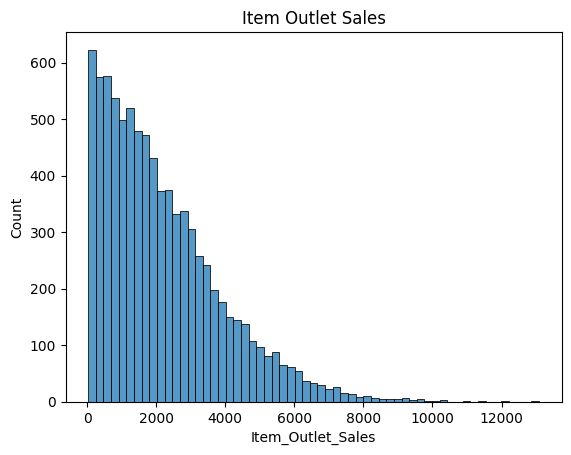

In [35]:

ax = sns.histplot(data= sp_df, x= 'Item_Outlet_Sales')

ax.set_title('Item Outlet Sales');

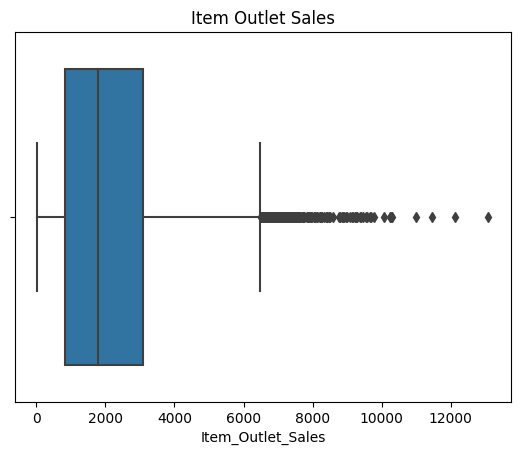

In [36]:
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = sp_df)
ax.set_title('Item Outlet Sales');

- Item Outlet Sales is greatly skewed to the right. 

- Heatmap of the correlation between features.

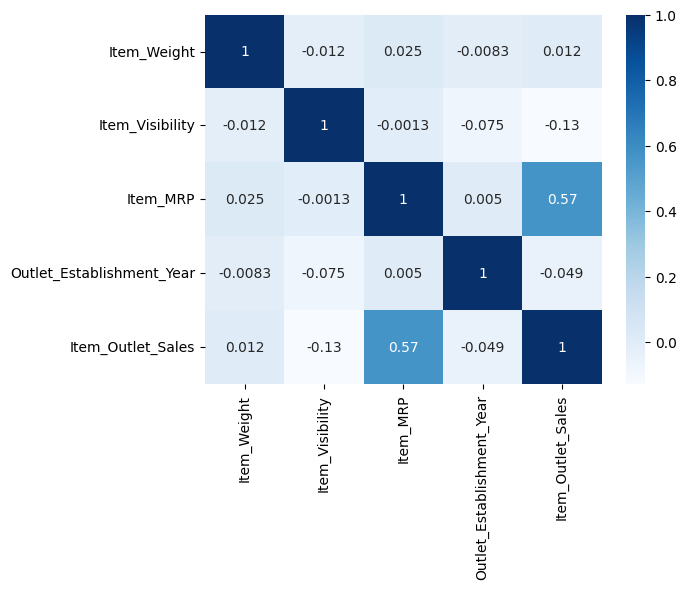

In [37]:
corr = sp_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True);

This heat map shows us that the strongest correlation is with Item Outle Sales and Item MRP.

##Explanatory Data Analysis

In [38]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


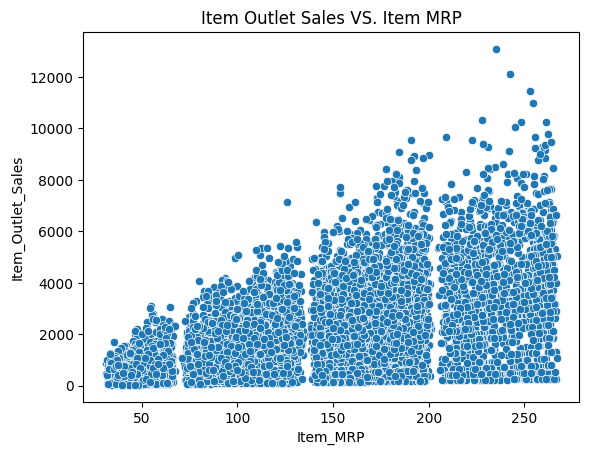

In [68]:
ax = sns.scatterplot(data = sp_df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales VS. Item MRP');

This scatter plot shows a moderate correlation between Item Outlet Sales and Item MRP.

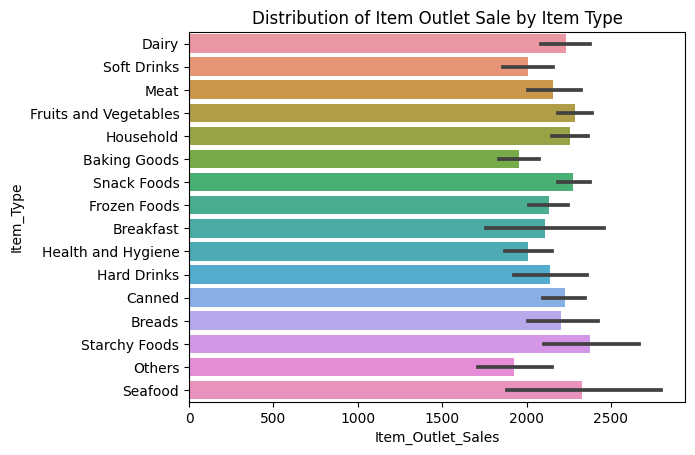

In [48]:
ax = sns.barplot(data = sp_df, x = 'Item_Outlet_Sales', y = 'Item_Type');
ax.set_title('Distribution of Item Outlet Sales by Item Type');

Which item type has the highest item outlet sales?

- This bar plot shows us that Seafood item's have the highest sales. Secondly, is going to be Starchy item's. We see this by the error bar show us the max item outlet sales.

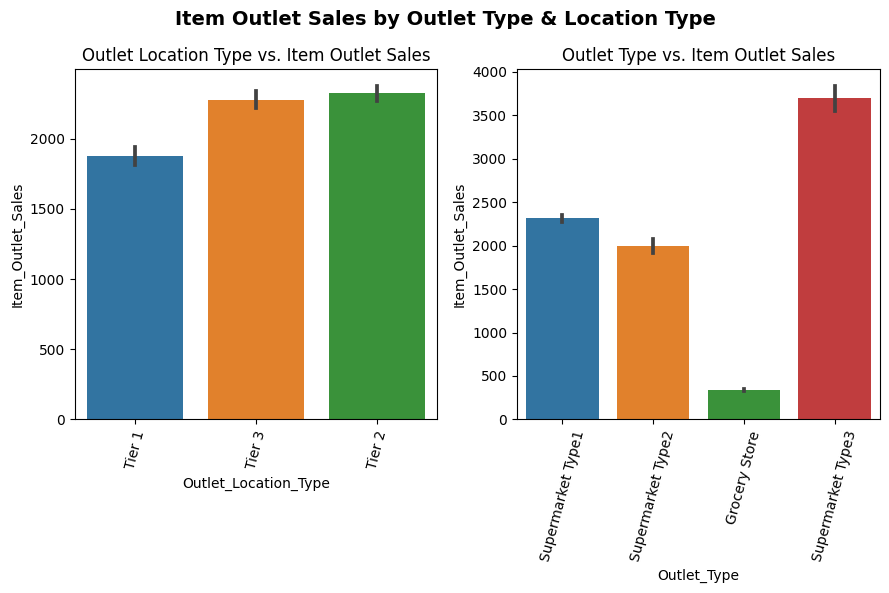

In [66]:
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))

sns.barplot(data = sp_df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes[0])

axes[0].set_title('Outlet Location Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

sns.barplot(data = sp_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[1])
axes[1].set_title('Outlet Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

fig.suptitle('Item Outlet Sales by Outlet Type & Location Type', fontsize = 14, fontweight = 'bold', y = .98)
fig.tight_layout();

Do Locations and Outlet types play a factor is producing high Item Outlet Sales?

- Tier 2 location type is highest is Item Outlet sales, but Tier 3 is a close second.
- As for Outlet Type, we see that the Supermarket Type 3 has the hightest in Item Outlet Sales when compared to the other Supermarket Types. The lowest being Grocery Store Outlet Type.